In [38]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random 
style.use('fivethirtyeight')


In [39]:
xs = np.array([1,2,3,4,5,6] ,dtype=np.float64)
ys = np.array([5,4,6,5,6,7] ,dtype=np.float64)

In [80]:
def create_dataset(hm, variance, step=2, correlation=False):
    val=1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation =='neg':
            val=step
        xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

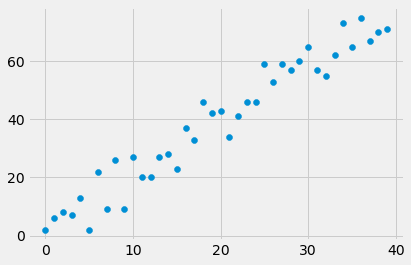

In [102]:
plt.scatter(xs,ys)
plt.show()



In [103]:
def best_fit_slope_and_y_intercept(xs,xy):
    m = ((mean(xs)*mean(ys)-mean(xs*ys)) / 
         ((mean(xs)*mean(xs))-mean(xs*xs)))
    b = mean(ys)-m*mean(xs)
    return m,b

In [104]:
def squareed_error(ys_origi, ys_line):
    
    return sum((ys_line-ys_origi)**2)

In [105]:
def coefficient_of_determination(ys_origi,ys_line):
    y_mean_line = [mean(ys_origi) for y in ys_origi]
    squared_error_regr = squareed_error(ys_origi, ys_line)
    squared_error_y_mean = squareed_error(ys_origi, y_mean_line)
    return 1-(squared_error_regr/squared_error_y_mean)

In [122]:
xs, ys = create_dataset(40,10, 2, correlation='pos')

In [123]:
m,b = best_fit_slope_and_y_intercept(xs,ys)


In [124]:
print(m,b)

1.9740150093808642 0.781707317073149


In [125]:
regression_line = [(m*x+b) for x in xs]

In [126]:
predict_x = 8
predict_y = m*predict_x+b

In [127]:
r_squared = coefficient_of_determination(ys,regression_line)

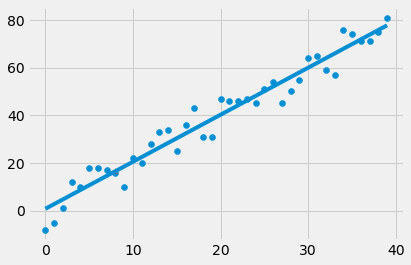

In [128]:
plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, marker='*')
plt.plot(xs,regression_line)
plt.show()

In [121]:
print(r_squared)

0.08412043514032119
